<a href="https://colab.research.google.com/github/winused/Clustering-AI-with-graphics-phyton/blob/main/Clustering_kaggle_dataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering - Project**

 **GOAL:** 

Complete the project and get the best results as it is possible.

**WHAT TO DO:**

Using dataset: [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) perform clustering for several variables using 2 different methods and compare results. 

**DESCRIPTION:**

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

**DETAILS:**

Please use two convinient to you clusterisation method. Present the results using python library to present the result and discusse it.

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample


#Data preparation

In [ ]:
df = pd.read_csv('CC GENERAL.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Yeni Bölüm

In [ ]:
df = df.dropna()

df.keys()

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


# Cluster Analysis Functions

In [ ]:
def plot_clusters(X, y):

  fig, ax = plt.subplots(figsize=(10, 8))

  if y is not None:
      for label in np.unique(y):
          ax.scatter(X[y == label, 0],
                      X[y == label, 1],
                      label=str(label))
  else:
      ax.scatter(X[:, 0], X[:, 1], label='samples')

  ax.set_xlabel('X1', size=14)
  ax.set_ylabel('X2', size=14)
  ax.legend(loc='best', fontsize=12)
  ax.grid(b=1)
  ax.legend(loc='best', fontsize=12)

In [ ]:
def init_cluster_centers(X, n_clusters):

    mu = resample(X, random_state=11, n_samples=n_clusters, replace=False)
    
    return mu

In [ ]:
def find_centers(mu, X):
  
    dists = []
    for mu_i in mu:
      val = (X - mu_i)**2
      val = val.sum(axis = 1)
      dists.append(val)

    dists = np.array(dists)
    labels = np.argmin(dists, axis =0)

    return labels

In [ ]:
def recalculate_centers(X, labels):

    cluster_centers = []
    cluster_labels = np.unique(labels)

    for cluster_label in cluster_labels:
        cluster_centers.append((X[labels == cluster_label]).mean(axis = 0))

    return np.array(cluster_centers)

In [ ]:
def k_mean(X, n_clusters, max_iter):
    
    # Init cluster centers
    
    cluster_centers = init_cluster_centers(X, n_clusters) 
    # Search for cluster centers
    for i in range(max_iter):
      labels = find_centers(cluster_centers, X)   
      cluster_centers = recalculate_centers(X, labels)
        
        
    return cluster_centers

#Failed cluster correlation

In [ ]:
K = df[['BALANCE','CREDIT_LIMIT']].to_numpy()
M = df[['PURCHASES','PURCHASES_TRX']].to_numpy()
L = df[['BALANCE','BALANCE_FREQUENCY']].to_numpy() #It does something but not well

In [ ]:
def processData(total_cluster, iterations, dataset):
  cluster_centers = init_cluster_centers(dataset, n_clusters= total_cluster)
  labels = find_centers(cluster_centers, dataset)
  new_cluster_centers = recalculate_centers(dataset, labels)
  cluster_centers = k_mean(X=dataset, n_clusters=total_cluster, max_iter=iterations)
  prediction = find_centers(cluster_centers, dataset)
  dataset = np.append(dataset, cluster_centers, axis=0)
  prediction = np.append(prediction,[6]*len(cluster_centers), axis=0)
  return dataset, prediction

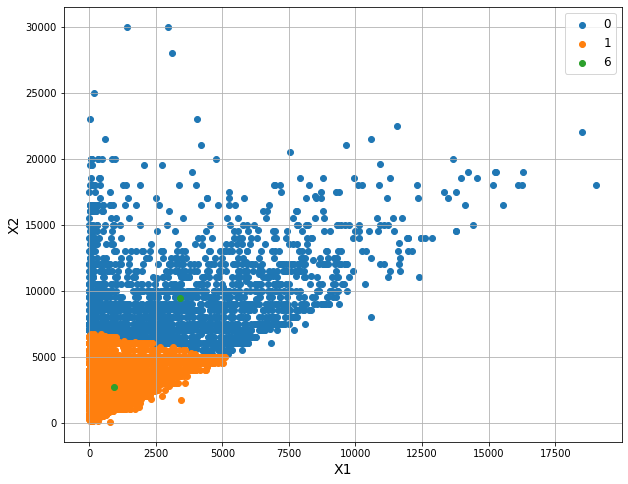

In [ ]:
dataset, prediction = processData(2, 100, K)
plot_clusters(dataset, prediction)

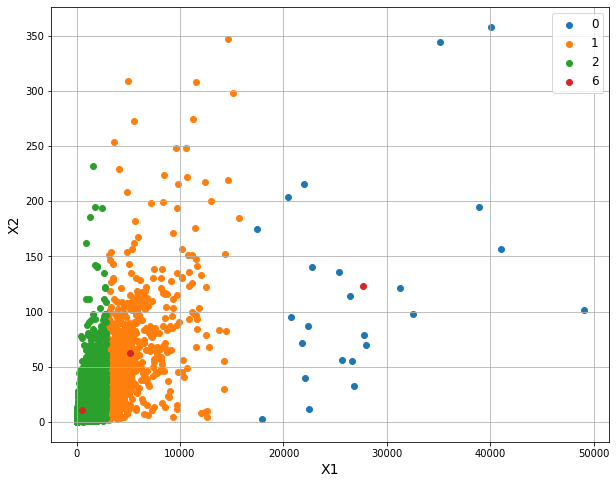

In [ ]:
dataset, prediction = processData(3, 500, M)
plot_clusters(dataset, prediction)

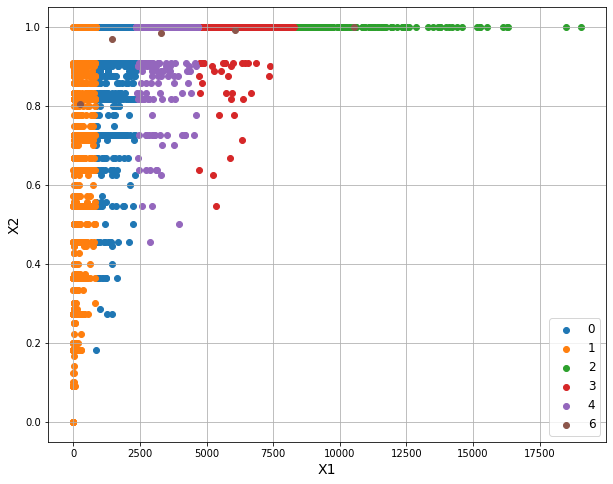

In [ ]:
dataset, prediction = processData(5, 100, L)
plot_clusters(dataset, prediction)

In [ ]:
T = df[['PAYMENTS','MINIMUM_PAYMENTS']].to_numpy()
A = df[['BALANCE','BALANCE_FREQUENCY']].to_numpy() #It does something but not well
B = df[['PAYMENTS','MINIMUM_PAYMENTS']].to_numpy()
C = df[['PAYMENTS','MINIMUM_PAYMENTS']].to_numpy()


# PURCHASES X PURCHASES_TRX 

We had defined M before as :
M = df[['PURCHASES','PURCHASES_TRX']].to_numpy()

Here you can see the results of clustering and plotting M.

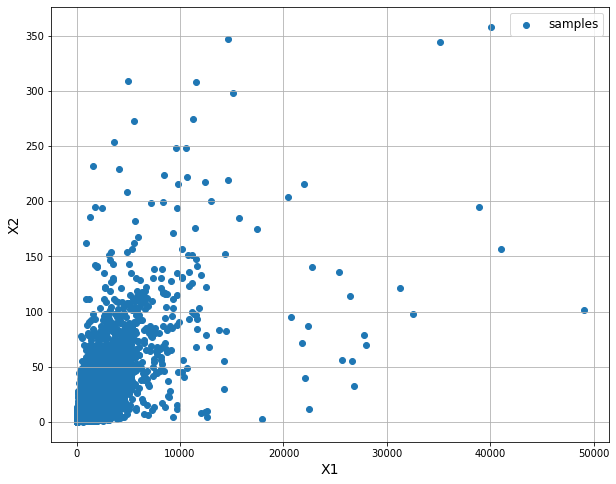

In [ ]:
plot_clusters(M, y=None)

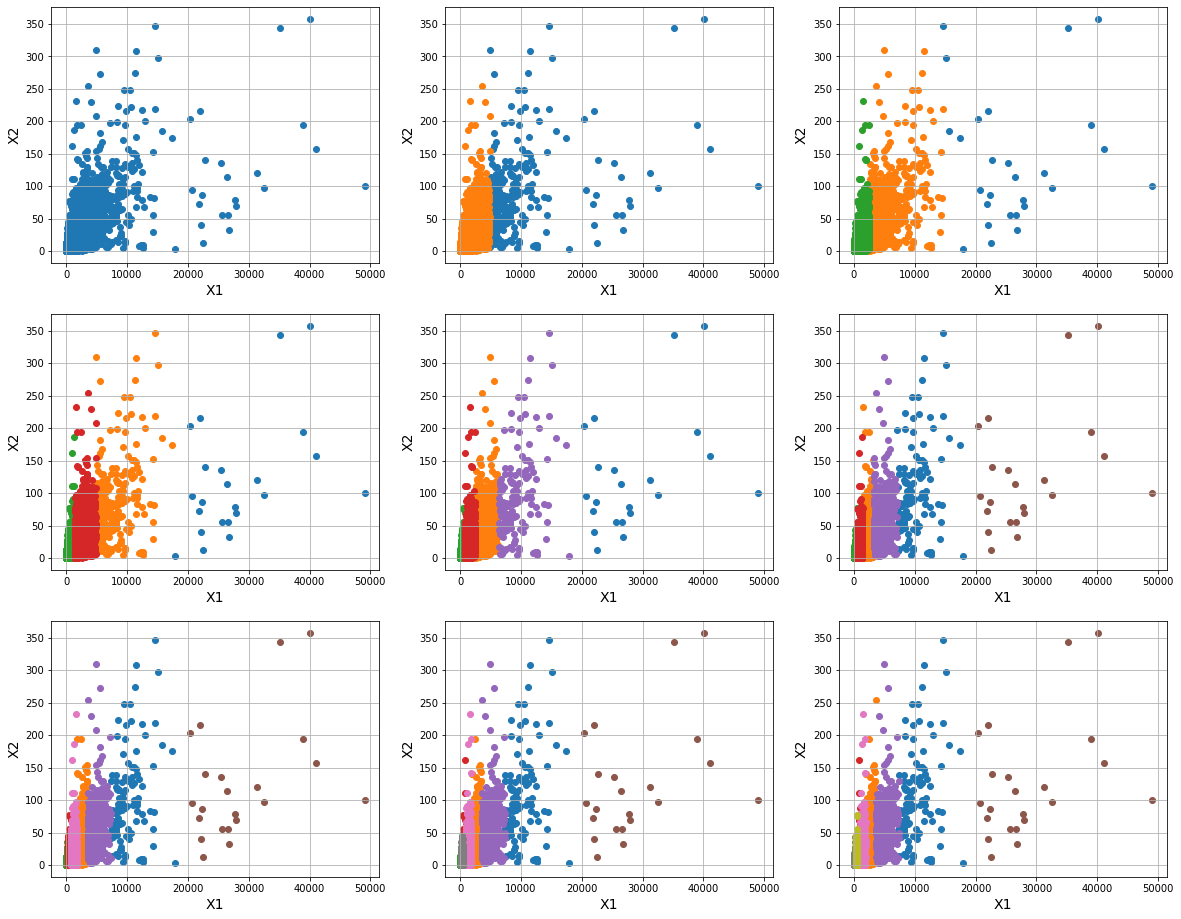

In [ ]:
# Unless it is specified, use plot_cluser for plotting results

def plot_clusters_(ax, M, y):

  if y is not None:
      for label in np.unique(y):
          ax.scatter(M[y == label, 0],
                      M[y == label, 1],
                      label=str(label))
  else:
      ax.scatter(M[:, 0], M[:, 1], label='samples')

  ax.set_xlabel('X1', size=14)
  ax.set_ylabel('X2', size=14)
  ax.grid(b=1)

def profile(rows, cols):
   i = 1
   fig, axes = plt.subplots(rows, cols, figsize=(20,16))
   for ax in axes:
      for a in ax:
        cluster_centers = k_mean(X=M, n_clusters=i, max_iter=20)
        prediction = find_centers(cluster_centers, M)
        plot_clusters_(a, M, prediction)
        i=i+1

profile(3, 3)



# BALANCE X CREDIT_LIMIT 

We had defined K before as :
K = df[['BALANCE','CREDIT_LIMIT']].to_numpy()

Here you can see the results of clustering and plotting Credit limit and balance with K means and DBSCAN

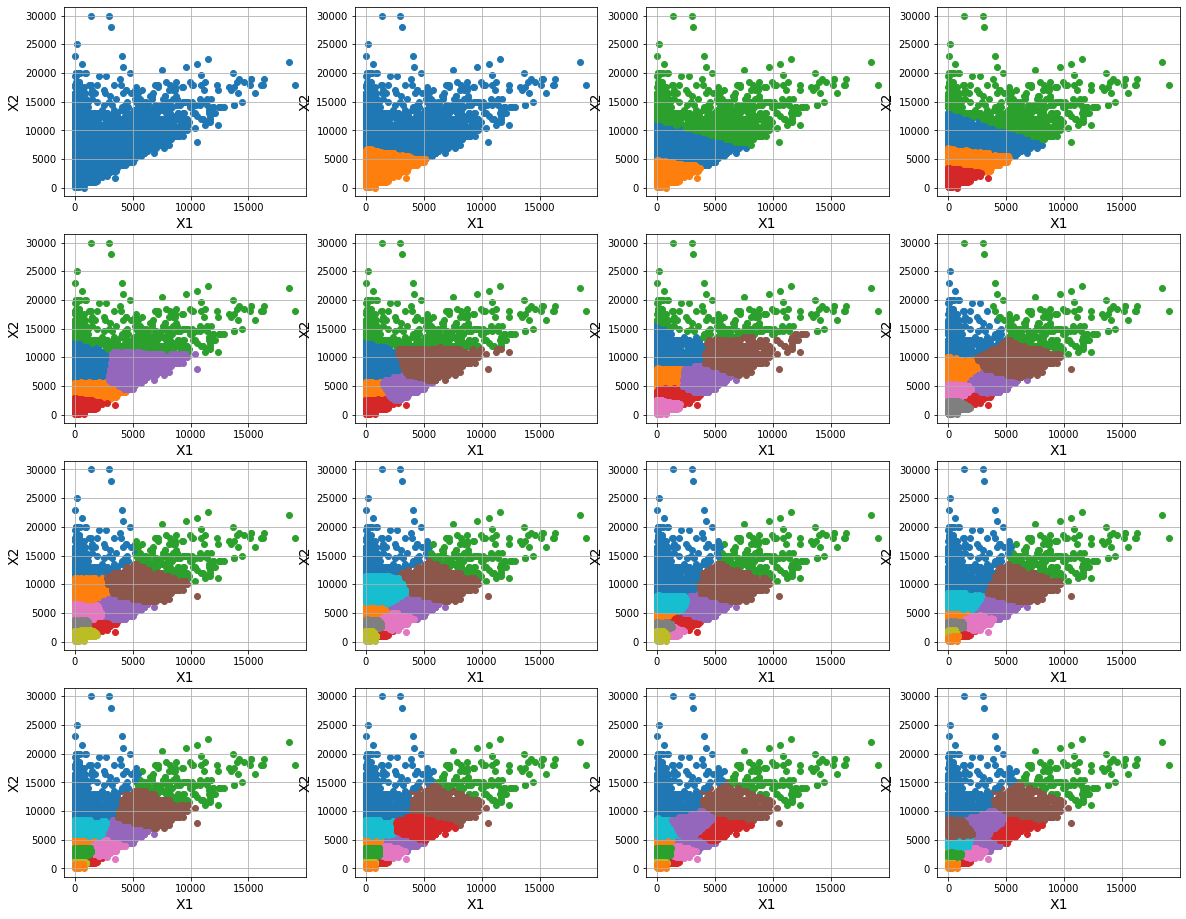

In [ ]:
# Unless it is specified, use plot_cluser for plotting results

def plot_clusters_(ax, K, y):

  if y is not None:
      for label in np.unique(y):
          ax.scatter(K[y == label, 0],
                      K[y == label, 1],
                      label=str(label))
  else:
      ax.scatter(K[:, 0], K[:, 1], label='samples')

  ax.set_xlabel('X1', size=14)
  ax.set_ylabel('X2', size=14)
  ax.grid(b=1)

def profile(rows, cols):
   i = 1
   fig, axes = plt.subplots(rows, cols, figsize=(20,16))
   for ax in axes:
      for a in ax:
        cluster_centers = k_mean(X=K, n_clusters=i, max_iter=20)
        prediction = find_centers(cluster_centers, K)
        plot_clusters_(a, K, prediction)
        i=i+1

profile(4, 4)


Estimated number of clusters: 0


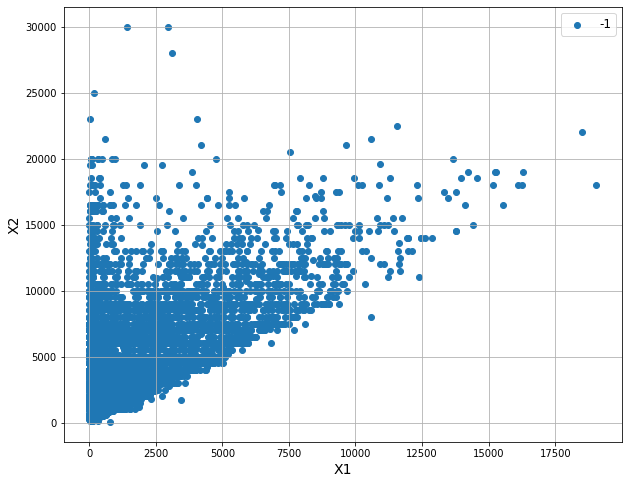

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=50).fit(K)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)

plot_clusters(K, labels)

# Experiments With 3 Dimensional Data 

In [ ]:
X = df[['BALANCE','CREDIT_LIMIT', 'CASH_ADVANCE_FREQUENCY']].to_numpy()

X = df[['BALANCE','CREDIT_LIMIT', 'PURCHASES']].to_numpy()=8613 clusters

X = df[['BALANCE','CREDIT_LIMIT', 'BALANCE_FREQUENCY']].to_numpy() = 8440

X = df[['BALANCE','CREDIT_LIMIT', 'ONEOFF_PURCHASES']].to_numpy() = 8438

X = df[['BALANCE','CREDIT_LIMIT', 'CASH_ADVANCE']].to_numpy() = 8376

X = df[['BALANCE','CREDIT_LIMIT', 'ONEOFF_PURCHASES_FREQUENCY']].to_numpy() = 8367

X = df[['BALANCE','CREDIT_LIMIT', 'CASH_ADVANCE_FREQUENCY']].to_numpy() = 8316

The numbers are the number of clusters existing in the 3D data results.

Estimated number of clusters: 8316


KeyboardInterrupt: ignored

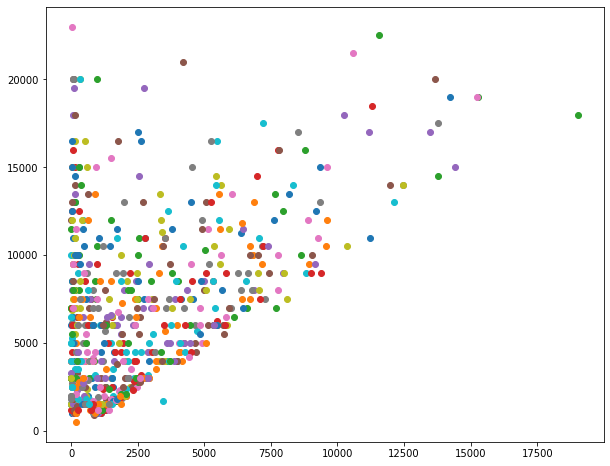

In [ ]:
from sklearn.cluster import DBSCAN

data = X

db = DBSCAN(eps=0.12, min_samples=1).fit(data)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)

plot_clusters(X, labels)
